In [1]:
# Monthly Sales Analysis
# Analysis of Sales by category
# Analysis of Monthly Profits
# Profit Analysis by Category
# Sales and profit analysis by customer segment

In [25]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors

pio.templates.default = "plotly_white"


In [30]:
data = pd.read_csv("Ecommerce.csv", encoding = 'latin-1')
data

,ï»¿Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [7]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
# Insert 3 new Columns as Order Month,Order Year and Order Day

In [57]:
data.drop('Formated Date' ,axis =1, inplace = True)
data.drop('Formated Date1' ,axis =1, inplace = True)

In [55]:
data['Order Date'] = pd.to_datetime(data['Order Date'],format = 'mixed') #to convert order date column to datetime format
data['Order Date1'] = data['Order Date'].dt.strftime('%m/%d/%Y') #Inserting a column of new Order date with desired format and string data type

data['Ship Date'] = pd.to_datetime(data['Ship Date'],format = 'mixed')
data['Ship Date1'] = data['Ship Date'].dt.strftime('%m/%d/%Y')
print(data)

      ï»¿Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0             1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1             2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2             3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3             4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4             5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...         ...             ...        ...        ...             ...   
9989       9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990       9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991       9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992       9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993       9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consu

In [58]:
data.dtypes

ï»¿Row ID                 int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Order Date1              object
Ship Date1               object
dtype: object

In [61]:
data['Order Date1'] =pd.to_datetime(data['Order Date1'])
data['Ship Date1'] =pd.to_datetime(data['Ship Date1'])
data['Order Month'] = data['Order Date1'].dt.month
data['Order Year'] = data['Order Date1'].dt.year
data['Order Day of Week'] = data['Order Date1'].dt.dayofweek

In [62]:
data.dtypes

ï»¿Row ID                     int64
Order ID                     object
Order Date           datetime64[ns]
Ship Date            datetime64[ns]
Ship Mode                    object
Customer ID                  object
Customer Name                object
Segment                      object
Country                      object
City                         object
State                        object
Postal Code                   int64
Region                       object
Product ID                   object
Category                     object
Sub-Category                 object
Product Name                 object
Sales                       float64
Quantity                      int64
Discount                    float64
Profit                      float64
Order Date1          datetime64[ns]
Ship Date1           datetime64[ns]
Order Month                   int32
Order Year                    int32
Order Day of Week             int32
dtype: object

In [64]:
data.head()

,ï»¿Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Order Date1,Ship Date1,Order Month,Order Year,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11-08,2016-11-11,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11-08,2016-11-11,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06-12,2016-06-16,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10-11,2015-10-18,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10-11,2015-10-18,10,2015,6


In [ ]:
# Monthly Sales Analysis

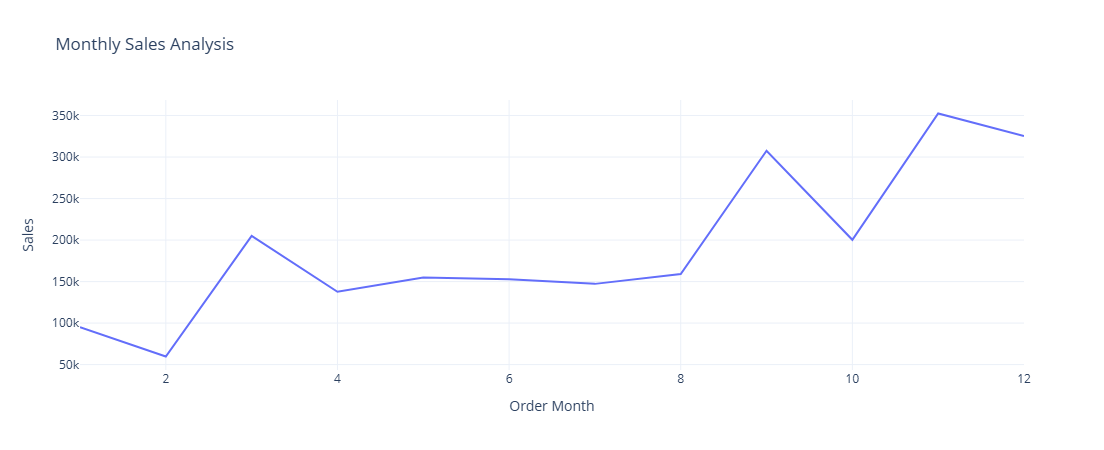

In [93]:
sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()
fig = px.line(sales_by_month,x = 'Order Month', y = 'Sales',title = ' Monthly Sales Analysis',width = 1000, height =450)
fig.show()

In [94]:
# Analysis of Sales by category

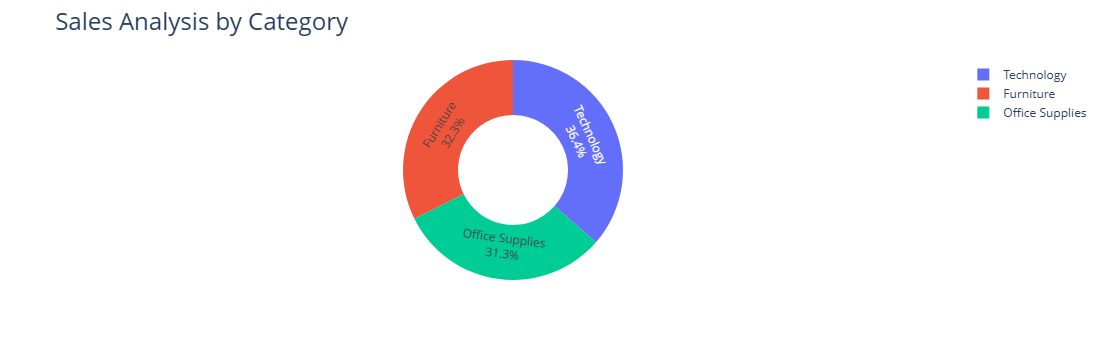

In [107]:
category_sales = data.groupby('Category')['Sales'].sum().reset_index()

fig = px.pie(category_sales,names = 'Category',values = 'Sales',hole =0.5)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.update_layout(title_text='Sales Analysis by Category',title_font=dict(size=24))
fig.show()

In [108]:
# Analysis of Monthly Profits

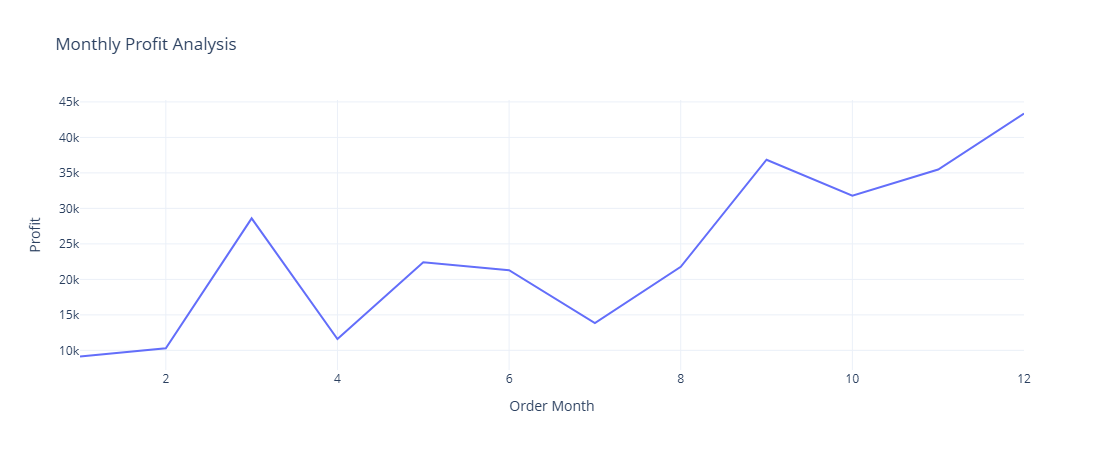

In [109]:
profit_by_month = data.groupby('Order Month')['Profit'].sum().reset_index()
fig = px.line(profit_by_month,x = 'Order Month', y = 'Profit',title = ' Monthly Profit Analysis',width = 1000, height =450)
fig.show()

In [110]:
# Profit Analysis by Category

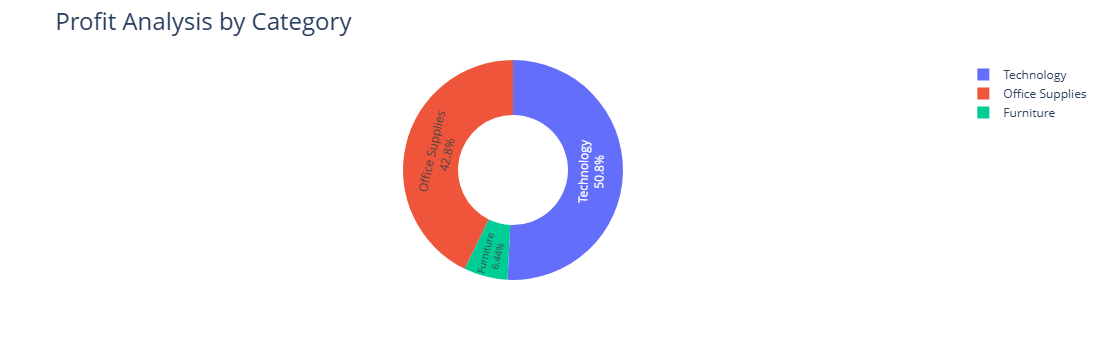

In [111]:
category_sales = data.groupby('Category')['Profit'].sum().reset_index()

fig = px.pie(category_sales,names = 'Category',values = 'Profit',hole =0.5)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.update_layout(title_text='Profit Analysis by Category',title_font=dict(size=24))
fig.show()

In [112]:
# Sales and profit analysis by customer segment

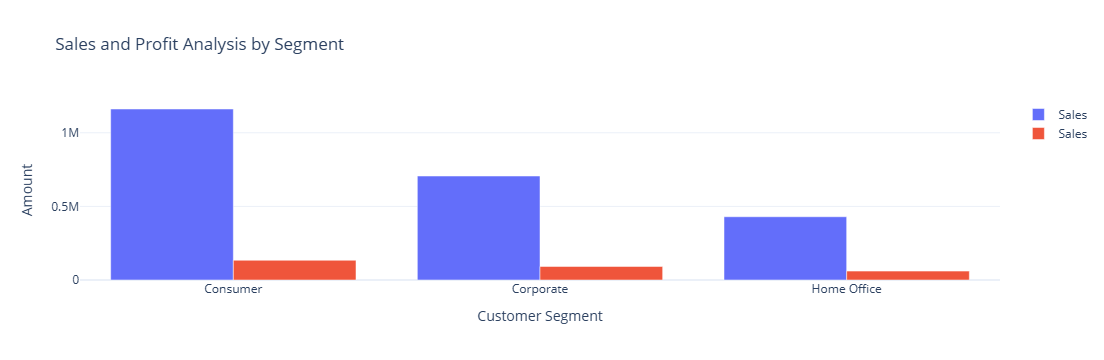

In [123]:
sales_profit_segement = data.groupby('Segment').agg({'Sales' : 'sum','Profit' :'sum'}).reset_index()

fig = go.Figure()
fig.add_traces(go.Bar(x =sales_profit_segement['Segment'],
                      y =sales_profit_segement['Sales'],
                      name = 'Sales'
                      #marker_color=color_palette([6]))
                     ))
fig.add_traces(go.Bar(x =sales_profit_segement['Segment'],
                      y =sales_profit_segement['Profit'],
                      name = 'Sales'
                     # marker_color=color_palette([0]))
                     ))
fig.update_layout(title = 'Sales and Profit Analysis by Segment',
                  xaxis_title = 'Customer Segment', yaxis_title = 'Amount',)
fig.show()